In [1]:
import sys
import numpy as np
import matplotlib.pyplot as pl
!{sys.executable} -m pip install progressbar2
!{sys.executable} -m pip install pydub
import pydub

from core.util import ico_noise_cancellation

In [2]:
scale = 1.25        # scales distances in coordinate system by this factor
T_max = 5
lr = 1e-7
inputs = ["firetruck.mp3"]
sources = np.array([[2,0]])
layout = np.array([[1,0], [1,1], [1,-1]])
cutoff_freqs = [None] * 4

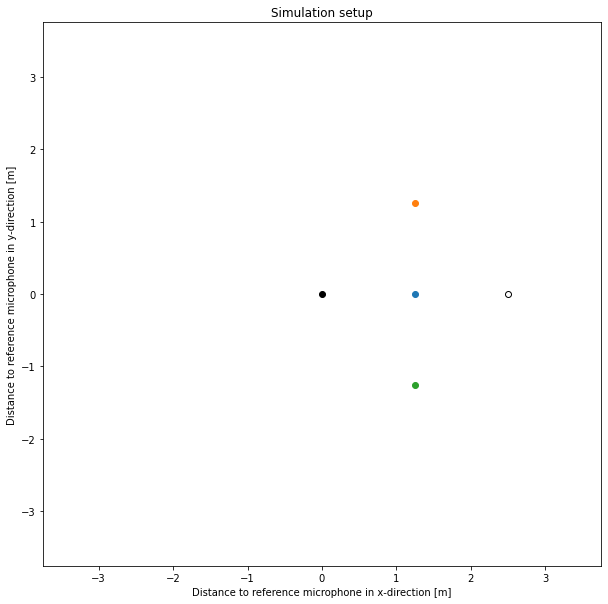

100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09


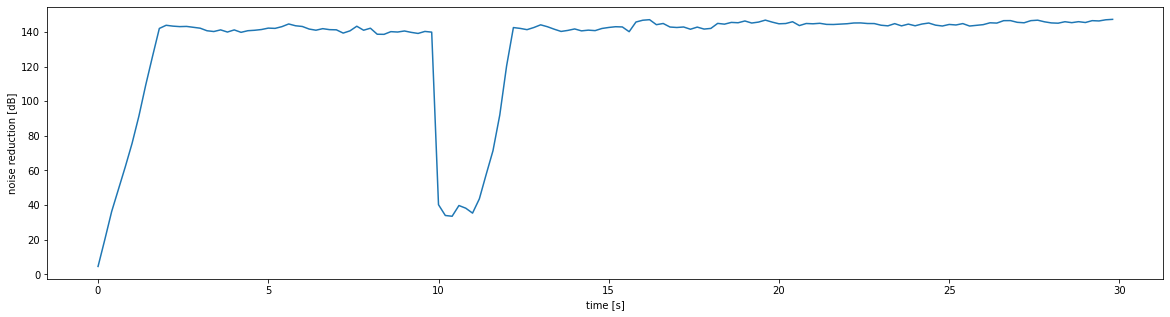

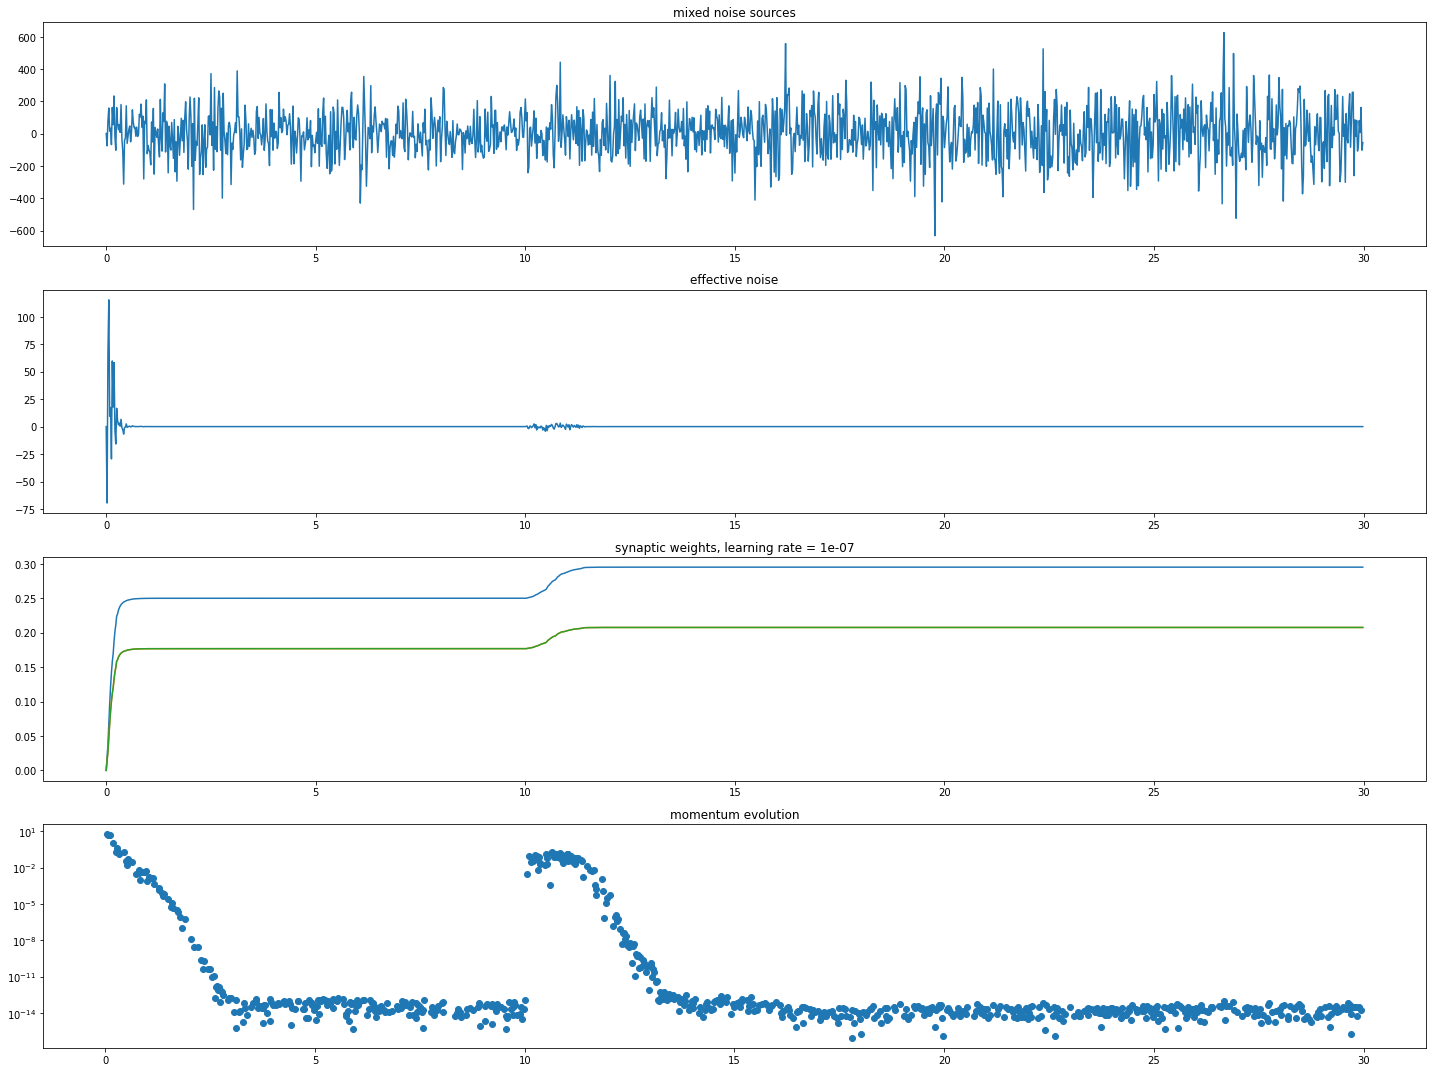

In [3]:
name = "fig2_drift_1sec"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, 30, lr=lr, shielding=False, print_file=True, plot=True, verbose=False, drift=True, drift_start=10, drift_end=11, name=name)

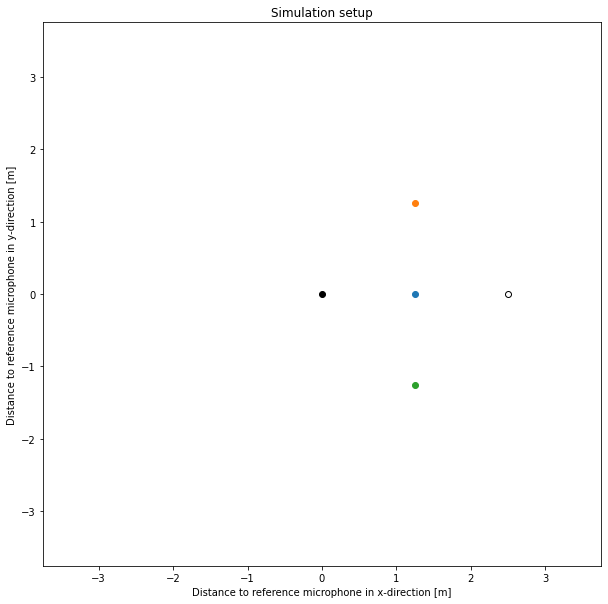

100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09


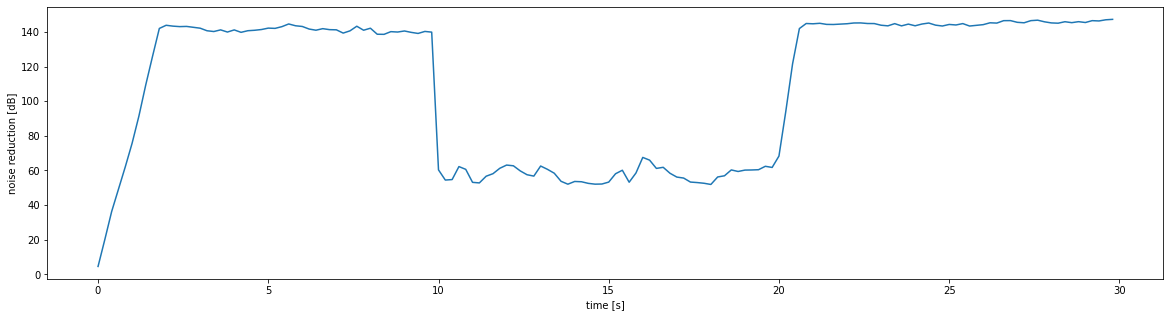

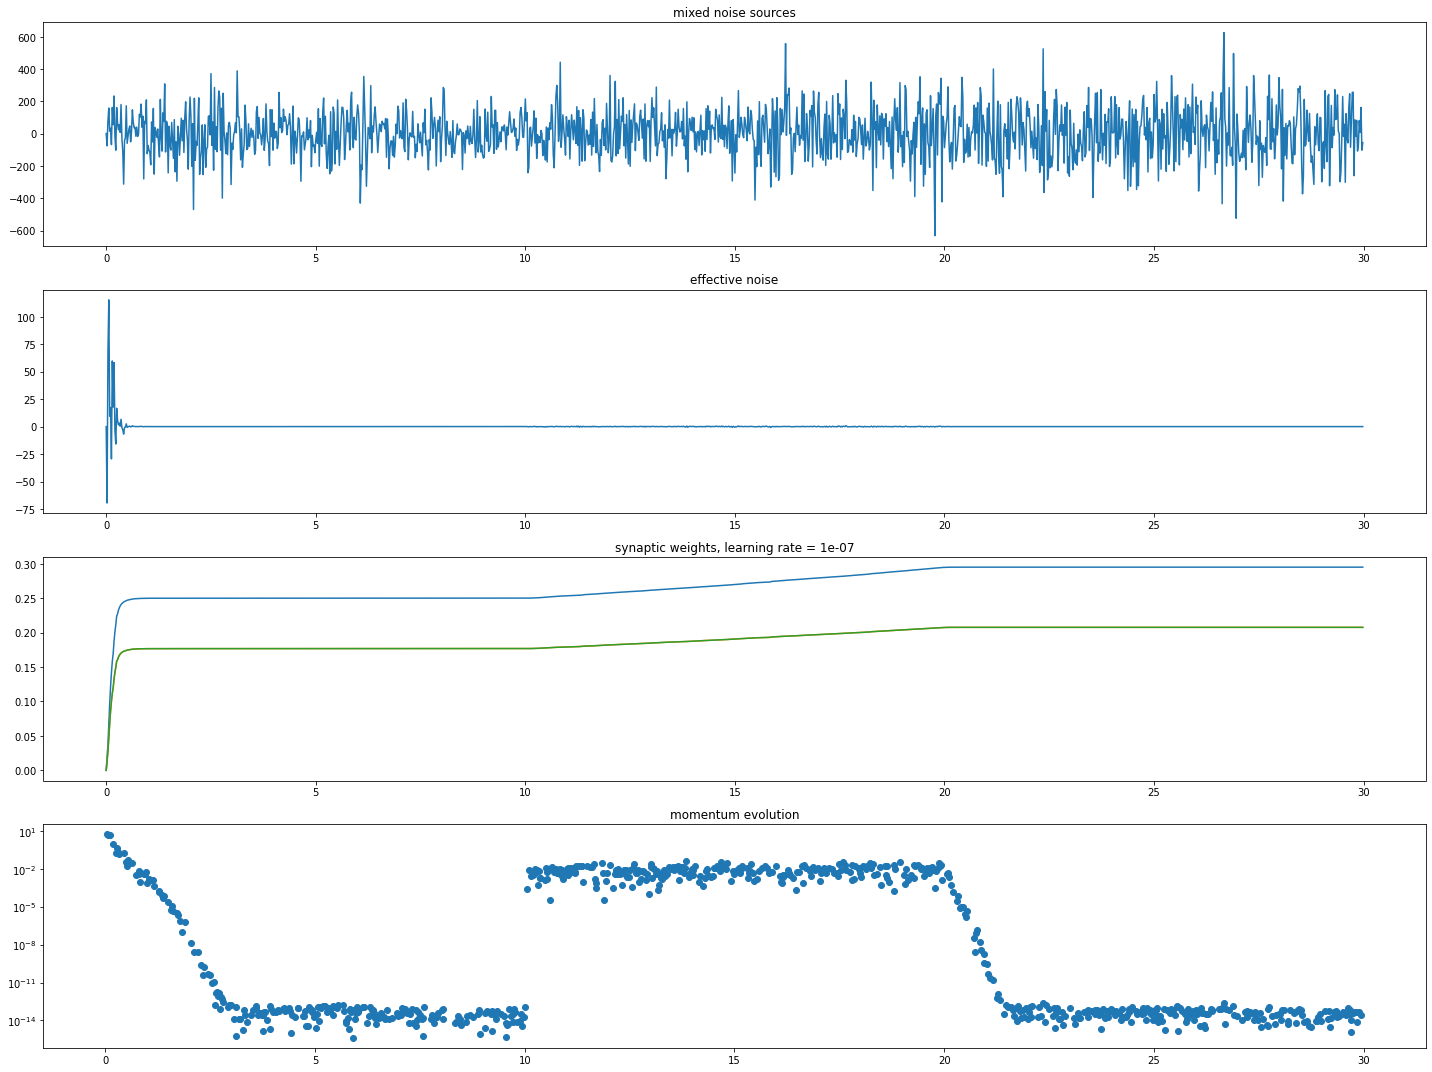

In [4]:
name = "fig2_drift_10sec"
results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, 30, lr=lr, shielding=False, print_file=True, plot=True, verbose=False, drift=True, drift_start=10, drift_end=20, name=name)

In [5]:
res, labels = [], []
x = 1
cutoff_freqs = [None] * 4
while x <= 10:
    results, audio, reference = ico_noise_cancellation(sources, layout, inputs, scale, cutoff_freqs, 30, lr=lr, shielding=False, print_file=False, plot=False, verbose=False, drift=True, drift_start=10, drift_end=10+x)
    res.append(np.mean(results))
    labels.append(str(x))
    x += 1

100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:10 Time:  0:00:10
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09
100% (719822 of 719822) |################| Elapsed Time: 0:00:09 Time:  0:00:09


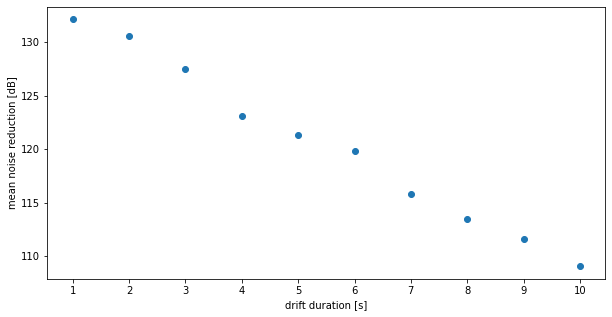

In [9]:
pl.figure(figsize=(10,5), facecolor='white')
pl.scatter(labels, res)
pl.xlabel("drift duration [s]")
pl.ylabel("mean noise reduction [dB]")
pl.savefig("imgs/fig2_drift_duration_vs_mean_noise_reduction.png", format="png")
pl.savefig("imgs/fig2_drift_duration_vs_mean_noise_reduction.svg", format="svg")
pl.show()